In [19]:
%reload_ext autoreload
%autoreload 2

# incompatibilities with CMIPDownloader

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import cmocean
import cartopy.crs as ccrs
import matplotlib as mpl
import json
import os
from scipy import stats

import sys
sys.path.append("..")
import utils
import plot_utils

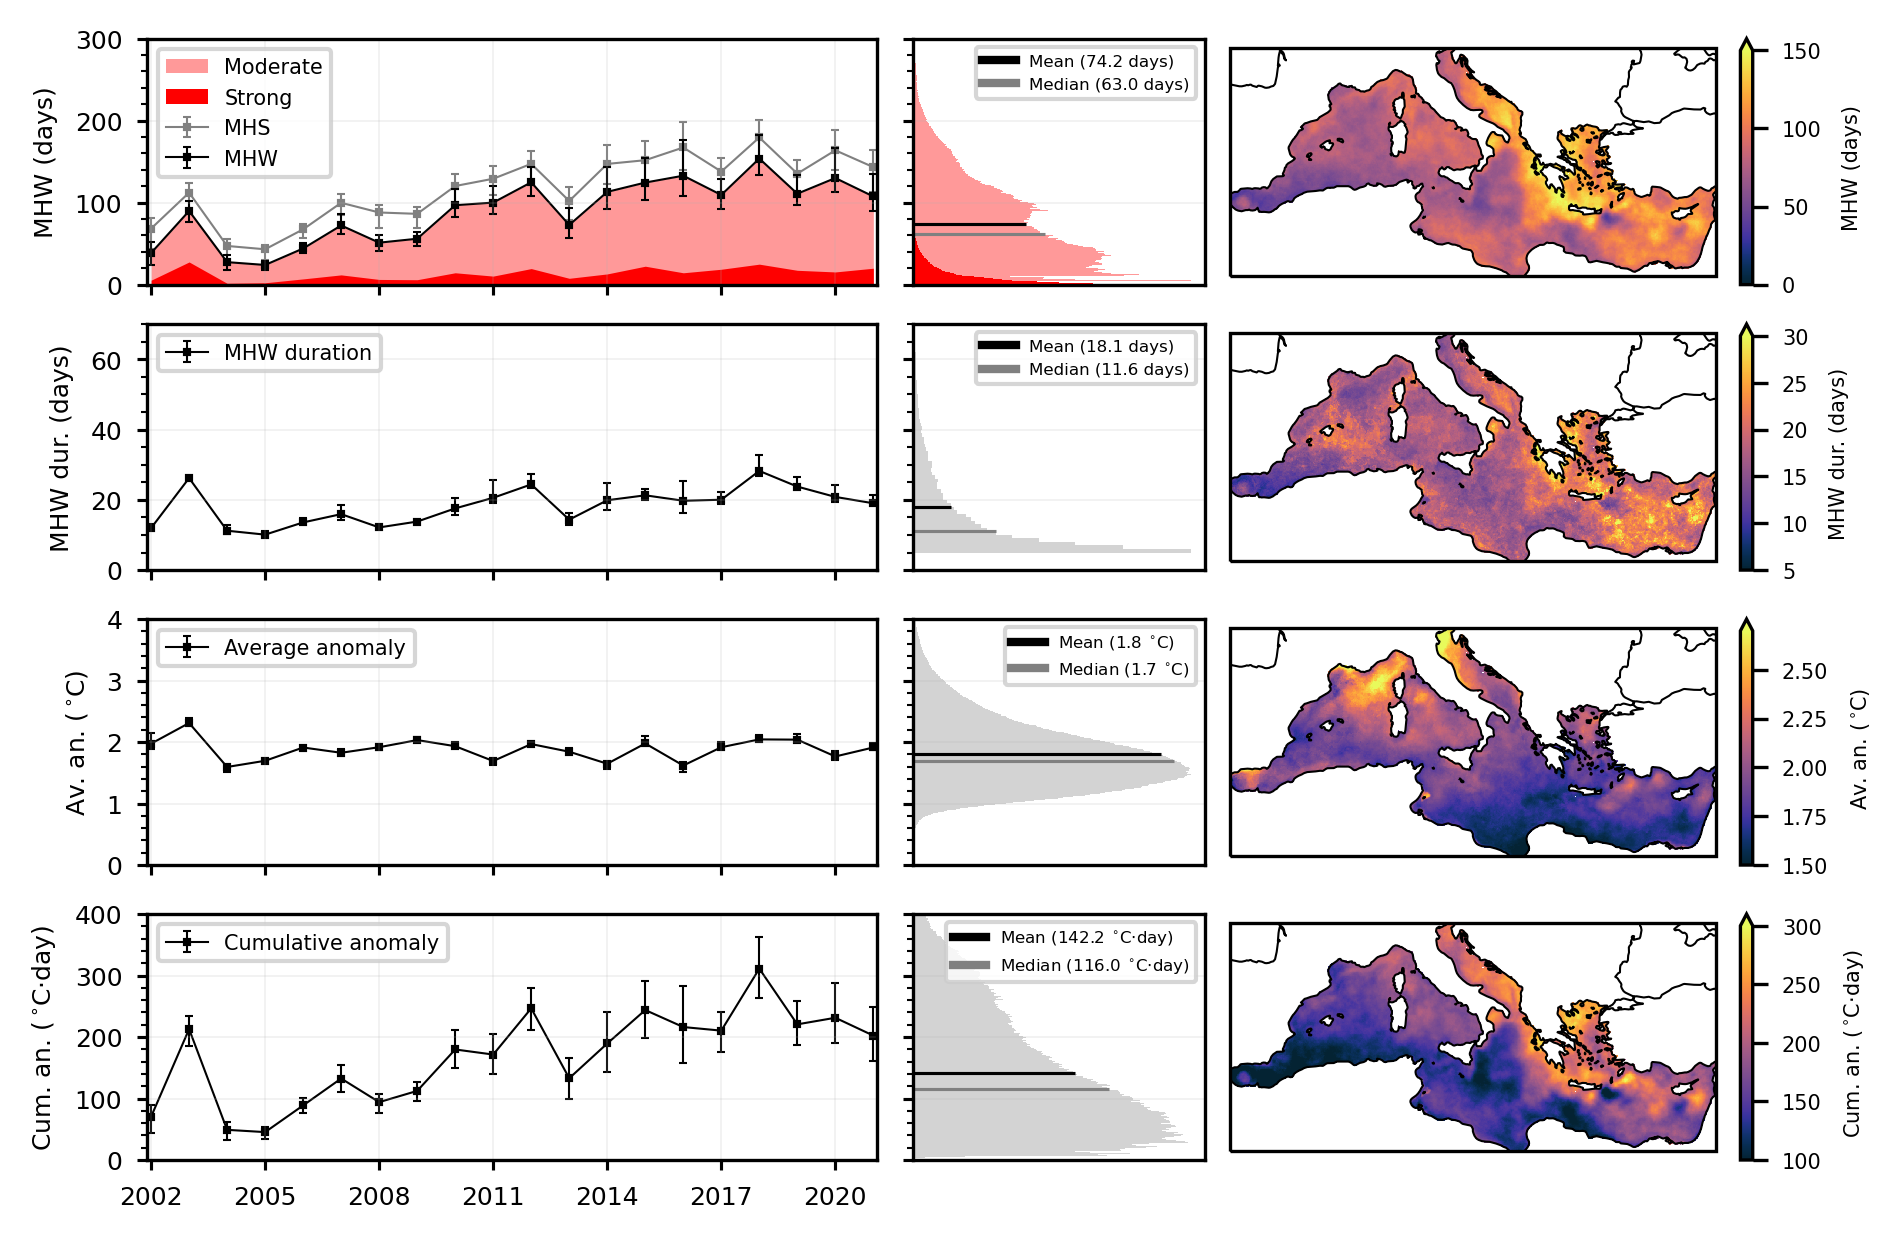

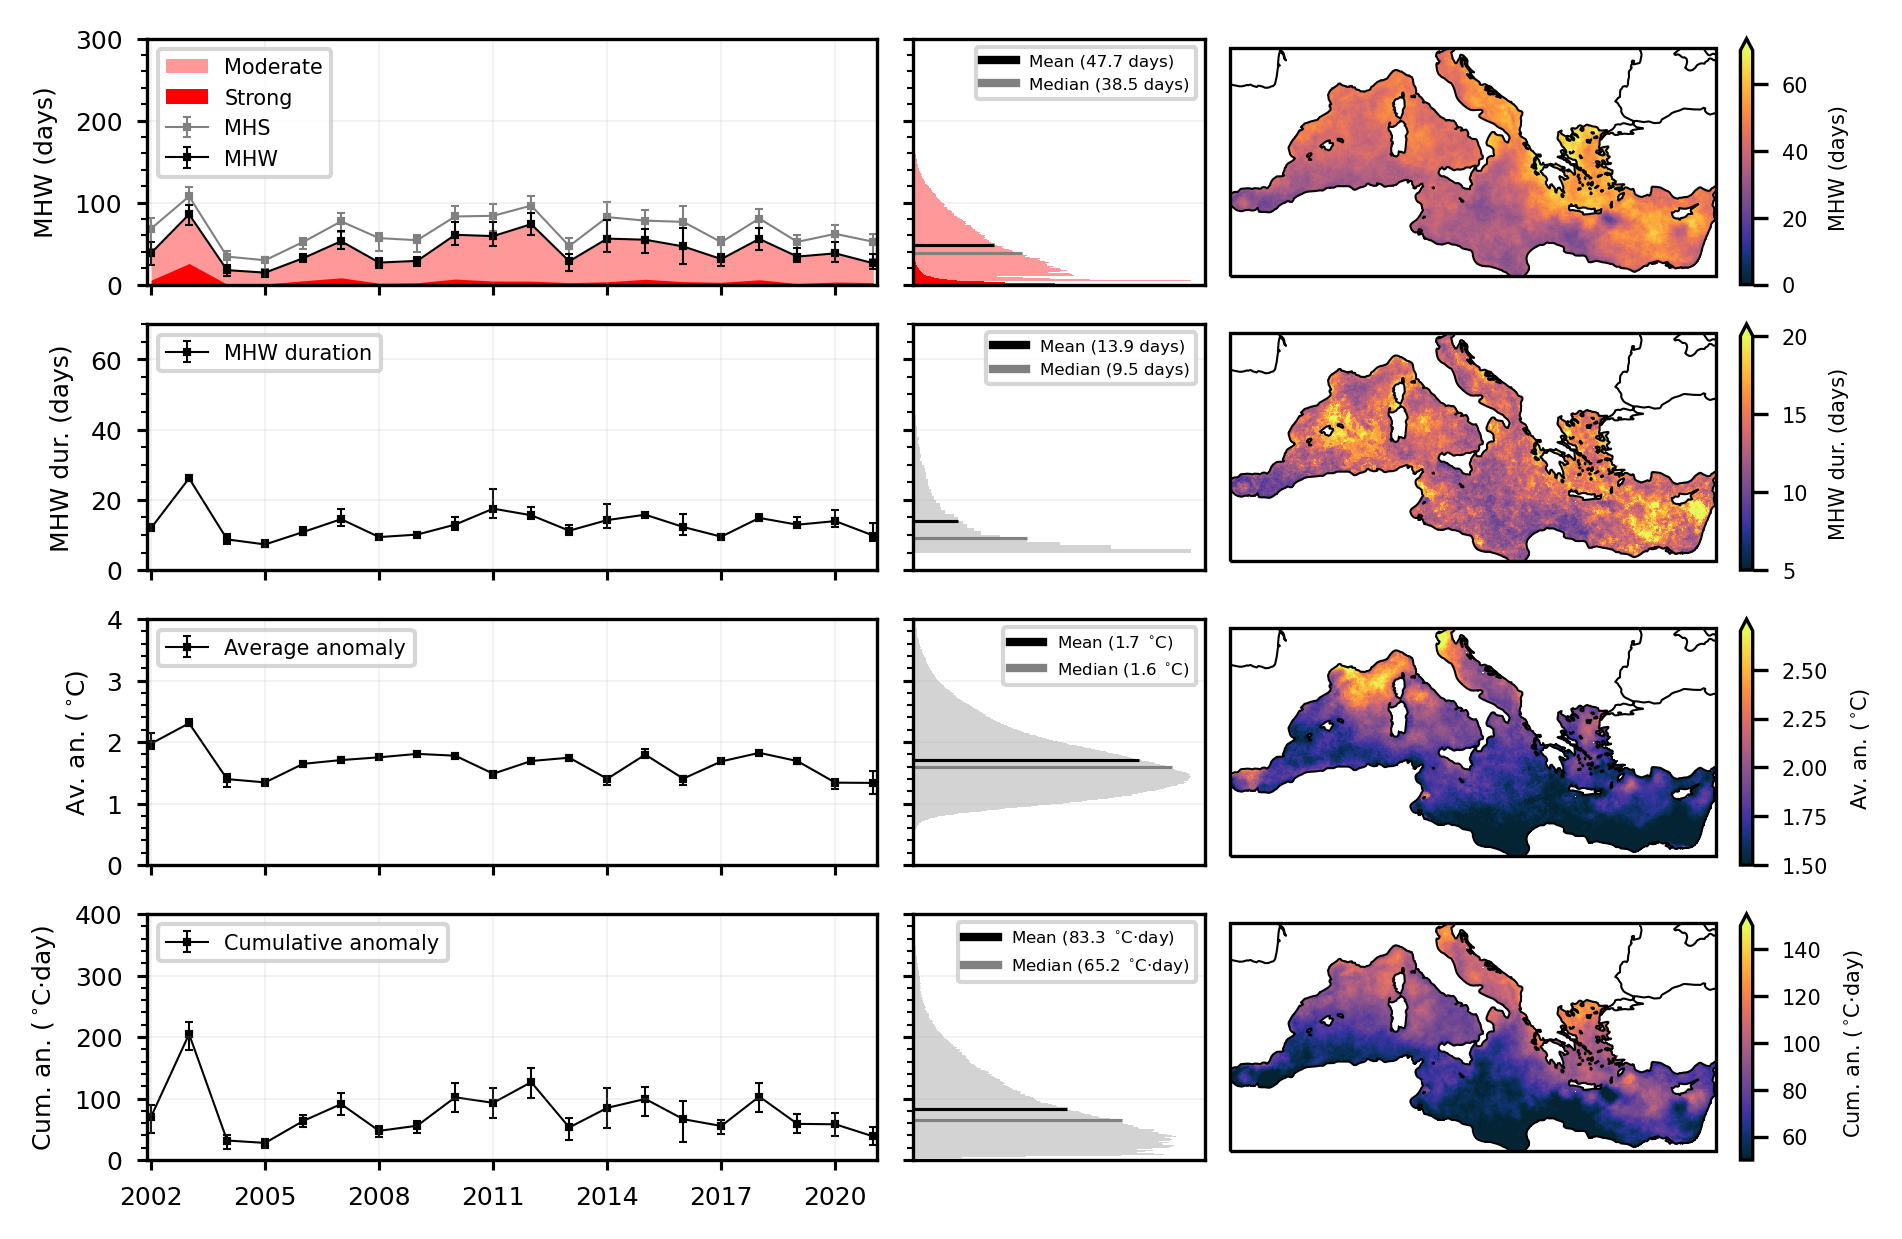

In [8]:
root_fold = "../../results/MHW/satellite/"

savefold = "../../figures/"

baselines = ['fixed_baseline', 'moving_baseline']

dss = {}

for baseline_type in baselines:
    savepath = f"{savefold}/fig_3_{baseline_type}.jpeg"

    if baseline_type == "fixed_baseline":
        map_lims = [[0, 150], [5, 30], [1.5, 2.7], [100, 300]]
    else:
        map_lims = [[0, 70], [5, 20], [1.5, 2.7], [50, 150]]

    baseline_years = 20

    fold = f"{root_fold}/{baseline_type}_{baseline_years}_year/"

    dss[baseline_type] = xr.open_mfdataset(f"{fold}/*.nc", combine="by_coords").compute()
    # lon_min = -1; lon_max = 5; lat_min = 37.5; lat_max = 42.5
    # ds = ds.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

    distributions = {}
    fold_distr = fold + "distributions/"
    for file in os.listdir(fold_distr):
        with open(f"{fold_distr}/{file}", "r") as infile:
            distributions[file[:-5]] = json.load(infile)
    metrics = list(distributions[file[:-5]].keys())
    distr_keys = list(distributions.keys())
    distributions["total"] = {}
    for metric in metrics:
        distributions["total"][metric] = {
            "hist": np.zeros(len(distributions[distr_keys[0]][metric]["hist"])),
            "bin_edges": distributions[distr_keys[0]][metric]["bin_edges"],
        }
        for key in distr_keys:
            distributions["total"][metric]["hist"] += np.array(
                distributions[key][metric]["hist"]
            )

    plot_utils.mhw_metrics(
        dss[baseline_type], distributions["total"], ratio=1.55, map_lims=map_lims, savepath=savepath
    )

In [25]:
a = dss['moving_baseline']['MHW_cat_2'].mean(['lat', 'lon', 'time']).values
a
#make a linear fit of a
# x = np.arange(len(a))
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, a)
# slope

array(4.86925604)

In [15]:
baseline = 'moving_baseline'

cat_1 = dss[baseline]['MHW'].mean(['lat', 'lon', 'time']).values
cat_2 = dss[baseline]['MHW_cat_2'].mean(['lat', 'lon', 'time']).values

cat

0.20273972602739726